# Comparison of calculated MAD-X and PTC Optics

MAD-X Versions:
- madx-linux64_v5_02_00
- madx-linux64_v5_06_01 (upgraded PTC)
- madx-linux64_v5_08_01 (upgraded PTC again?)

Lattice: 
- CERN Proton Synchrotron (Pre-LIU 1.2 GeV injection)
- Injection bump (to simulate tune swing etc)

- [ ] load and compare optimised_bare_simplified.tfs (PTC Twiss time=False)
- [ ] load and compare optimised_flat_file.tfs (PTC Twiss time=True)
- [ ] load and compare 1.tfs (First step in injection bump, MAD-X TWISS)
- [ ] load and compare 1.ptc (First step in injection bump, PTC TWISS)

Directories
- MAD-X v5.02: MADX_5_02_00/
    - MADX_5_02_00/optimised_bare_simplified.tfs
    - MADX_5_02_00/optimised_flat_file.tfs
    - MADX_5_02_00/MADX_Twiss/1.tfs
    - MADX_5_02_00/PTC_Twiss/1.ptc
- MAD-X v5.06.01: MADX_5_06_01/
    - MADX_5_06_01/optimised_bare_simplified.tfs
    - MADX_5_06_01/optimised_flat_file.tfs
    - MADX_5_06_01/MADX_Twiss/1.tfs
    - MADX_5_06_01/PTC_Twiss/1.ptc
- MAD-X v5.08.01: MADX_5_08_01/
    - MADX_5_08_01/optimised_bare_simplified.tfs
    - MADX_5_08_01/optimised_flat_file.tfs
    - MADX_5_08_01/MADX_Twiss/1.tfs
    - MADX_5_08_01/PTC_Twiss/1.ptc

In [19]:
import os
import tfs
import matplotlib.pyplot as plt
from matplotlib import gridspec

#### Functions

In [2]:
def pandas_lowercase_all_strings(df):    
    df.columns = map(str.lower, df.columns)

    for key in df.keys():
        if df[str(key)].dtype == 'O':
            #print(str(key+' column now lowercase'))
            df[str(key)] = df[str(key)].str.lower()
            
    return df

> #### Loading a TFS file is simple
> data_frame = tfs.read("path_to_input.tfs", index="index_column")
> 
> #### You can access and modify the headers with the .headers attribute
> useful_variable = data_frame.headers["SOME_KEY"]
> data_frame.headers["NEW_KEY"] = some_variable
> 
> #### Manipulate data as you do with pandas DataFrames
> data_frame["NEWCOL"] = data_frame.COL_A * data_frame.COL_B
> 
> #### You can check the validity of a TfsDataFrame, and choose the behavior in case of errors
> tfs.frame.validate(data_frame, non_unique_behavior="raise")  # or choose "warn"
> 
> #### Writing out to disk is simple too
> tfs.write("path_to_output.tfs", data_frame, save_index="index_column")

### Load Bare PTC Twiss (Time = False)

In [3]:
df_52_ptc_bare = tfs.read('MADX_5_02_00/optimised_bare_simplified.tfs')
df_52_ptc_bare = pandas_lowercase_all_strings(df_52_ptc_bare)

In [4]:
df_56_ptc_bare = tfs.read('MADX_5_06_01/optimised_bare_simplified.tfs')
df_56_ptc_bare = pandas_lowercase_all_strings(df_56_ptc_bare)

In [5]:
df_58_ptc_bare = tfs.read('MADX_5_08_01/optimised_bare_simplified.tfs')
df_58_ptc_bare = pandas_lowercase_all_strings(df_58_ptc_bare)

In [6]:
df_52_ptc_bare

,name,s,betx,bety,disp1,disp3,x,px,y,py
0,pr.bwsh65,0.0000,22.450144,11.705478,3.122081,0.0,0.0,0.0,0.0,0.0
1,drift_0,0.7970,22.433132,11.672422,3.121197,0.0,0.0,0.0,0.0,0.0
2,ps65$end,0.7970,22.433132,11.672422,3.121197,0.0,0.0,0.0,0.0,0.0
3,pr.bht65$start,0.7970,22.433132,11.672422,3.121197,0.0,0.0,0.0,0.0,0.0
4,mp65_f,0.7970,22.433132,11.672422,3.121197,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1124,mp64_f,627.5155,22.524560,11.848873,3.122972,0.0,0.0,0.0,0.0,0.0
1125,pr.bhu64$end,627.5155,22.524560,11.848873,3.122972,0.0,0.0,0.0,0.0,0.0
1126,ps65$start,627.5155,22.524560,11.848873,3.122972,0.0,0.0,0.0,0.0,0.0
1127,drift_4,628.3185,22.450144,11.705478,3.122081,0.0,0.0,0.0,0.0,0.0


In [7]:
df_52_ptc_bare.headers

OrderedDict([('NAME', 'PTC_TWISS'),
             ('TYPE', 'TWISS'),
             ('SEQUENCE', 'PS'),
             ('PARTICLE', 'PROTON'),
             ('MASS', 0.938272046),
             ('CHARGE', 1.0),
             ('ENERGY', 2.336654539),
             ('PC', 2.14),
             ('GAMMA', 2.49038064),
             ('KBUNCH', 1.0),
             ('BCURRENT', 0.0),
             ('SIGE', 0.0),
             ('SIGT', 0.0),
             ('NPART', 0.0),
             ('EX', 1.0),
             ('EY', 1.0),
             ('ET', 1.0),
             ('DELTAP', 0.0),
             ('LENGTH', 628.3185),
             ('ALPHA_C', 0.02701405245),
             ('ALPHA_C_P', -1000000.0),
             ('ALPHA_C_P2', -1000000.0),
             ('ALPHA_C_P3', -1000000.0),
             ('ETA_C', -0.1342243687),
             ('GAMMA_TR', 6.0842231),
             ('Q1', 0.209995083),
             ('Q2', 0.2449949686),
             ('DQ1', 0.7270470186),
             ('DQ2', -2.871126997),
             ('QS', 0.0)

### Load Flat File PTC Twiss (Time = True)

In [8]:
df_52_ptc_flat = tfs.read('MADX_5_02_00/optimised_flat_file.tfs')
df_52_ptc_flat = pandas_lowercase_all_strings(df_52_ptc_flat)

In [9]:
df_56_ptc_flat = tfs.read('MADX_5_06_01/optimised_flat_file.tfs')
df_56_ptc_flat = pandas_lowercase_all_strings(df_56_ptc_flat)

In [10]:
df_58_ptc_flat = tfs.read('MADX_5_08_01/optimised_flat_file.tfs')
df_58_ptc_flat = pandas_lowercase_all_strings(df_58_ptc_flat)

### Load First PTC Twiss

In [11]:
df_52_ptc_1 = tfs.read('MADX_5_02_00/PTC_Twiss/1.ptc')
df_52_ptc_1 = pandas_lowercase_all_strings(df_52_ptc_1)

In [12]:
df_56_ptc_1 = tfs.read('MADX_5_06_01/PTC_Twiss/1.ptc')
df_56_ptc_1 = pandas_lowercase_all_strings(df_56_ptc_1)

In [13]:
df_58_ptc_1 = tfs.read('MADX_5_08_01/PTC_Twiss/1.ptc')
df_58_ptc_1 = pandas_lowercase_all_strings(df_58_ptc_1)

### Load First MAD-X Twiss

In [14]:
df_52_madx_1 = tfs.read('MADX_5_02_00/MADX_Twiss/1.tfs')
df_52_madx_1 = pandas_lowercase_all_strings(df_52_madx_1)

In [15]:
df_56_madx_1 = tfs.read('MADX_5_06_01/MADX_Twiss/1.tfs')
df_56_madx_1 = pandas_lowercase_all_strings(df_56_madx_1)

In [16]:
df_58_madx_1 = tfs.read('MADX_5_08_01/MADX_Twiss/1.tfs')
df_58_madx_1 = pandas_lowercase_all_strings(df_58_madx_1)

#### Test Access

In [47]:
df_52_ptc_bare.disp1

0       3.122081
1       3.121197
2       3.121197
3       3.121197
4       3.121197
          ...   
1124    3.122972
1125    3.122972
1126    3.122972
1127    3.122081
1128    3.122081
Name: disp1, Length: 1129, dtype: float64

In [24]:
len(df_52_ptc_bare.s)

1129

In [25]:
len(df_56_ptc_bare.s)

1129

In [26]:
len(df_58_ptc_bare.s)

1129

#### Template Plot 

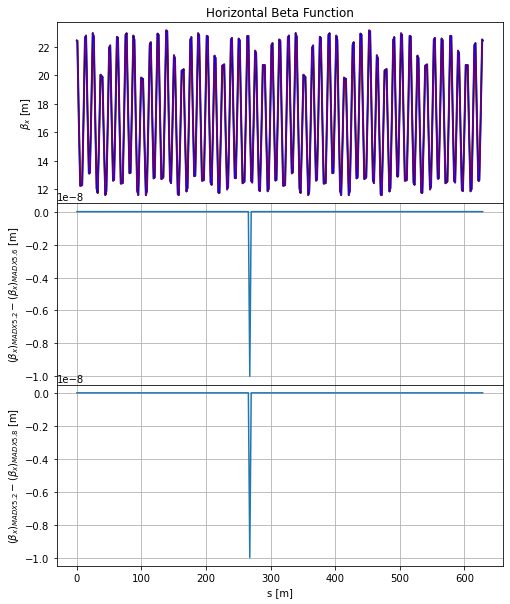

In [42]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[8, 10])
gs = fig1.add_gridspec(ncols=1,nrows=3, height_ratios=[1,1,1])
gs.update(wspace=0.025, hspace=0.)

ax1 = fig1.add_subplot(gs[0,0])
ax2 = fig1.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig1.add_subplot(gs[2,0], sharex=ax1)

ax1.plot(df_52_ptc_bare.s, df_52_ptc_bare.betx, lw=2.0, color='k')
ax1.plot(df_56_ptc_bare.s, df_56_ptc_bare.betx, lw=1.5, color='r')
ax1.plot(df_58_ptc_bare.s, df_58_ptc_bare.betx, lw=1.0, color='b')


ax2.plot(df_52_ptc_bare.s, df_52_ptc_bare.betx-df_56_ptc_bare.betx)
ax3.plot(df_52_ptc_bare.s, df_52_ptc_bare.betx-df_58_ptc_bare.betx)

ax2.grid()
ax3.grid()

#ax1_1 = ax1.twinx()
ax1.set_title('PTC: Bare: Horizontal Beta Function');
ax1.set_ylabel(r'$\beta_x$ [m]');
ax2.set_ylabel(r'$\left(\beta_x\right)_{MADX 5.2} - \left(\beta_x\right)_{MADX 5.6}$ [m]');
ax3.set_ylabel(r'$\left(\beta_x\right)_{MADX 5.2} - \left(\beta_x\right)_{MADX 5.8}$ [m]');
ax3.set_xlabel('s [m]');

#save_file = save_folder + 'Kick_Comparison_2022_V_FMon.png'
#plt.savefig(save_file, bbox_inches='tight')

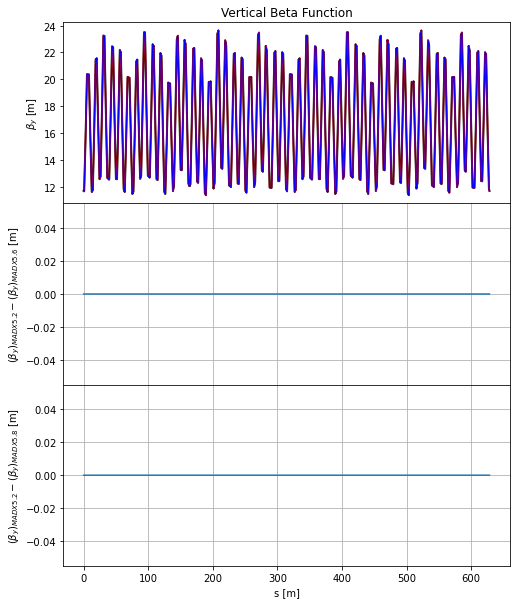

In [43]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[8, 10])
gs = fig1.add_gridspec(ncols=1,nrows=3, height_ratios=[1,1,1])
gs.update(wspace=0.025, hspace=0.)

ax1 = fig1.add_subplot(gs[0,0])
ax2 = fig1.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig1.add_subplot(gs[2,0], sharex=ax1)

ax1.plot(df_52_ptc_bare.s, df_52_ptc_bare.bety, lw=2.0, color='k')
ax1.plot(df_56_ptc_bare.s, df_56_ptc_bare.bety, lw=1.5, color='r')
ax1.plot(df_58_ptc_bare.s, df_58_ptc_bare.bety, lw=1.0, color='b')


ax2.plot(df_52_ptc_bare.s, df_52_ptc_bare.bety-df_56_ptc_bare.bety)
ax3.plot(df_52_ptc_bare.s, df_52_ptc_bare.bety-df_58_ptc_bare.bety)

ax2.grid()
ax3.grid()

#ax1_1 = ax1.twinx()
ax1.set_title('PTC: Bare: Vertical Beta Function');
ax1.set_ylabel(r'$\beta_y$ [m]');
ax2.set_ylabel(r'$\left(\beta_y\right)_{MADX 5.2} - \left(\beta_y\right)_{MADX 5.6}$ [m]');
ax3.set_ylabel(r'$\left(\beta_y\right)_{MADX 5.2} - \left(\beta_y\right)_{MADX 5.8}$ [m]');
ax3.set_xlabel('s [m]');

#save_file = save_folder + 'Kick_Comparison_2022_V_FMon.png'
#plt.savefig(save_file, bbox_inches='tight')

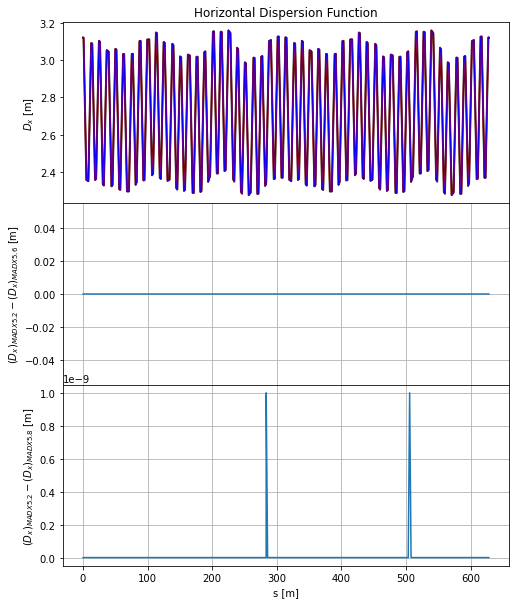

In [49]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[8, 10])
gs = fig1.add_gridspec(ncols=1,nrows=3, height_ratios=[1,1,1])
gs.update(wspace=0.025, hspace=0.)

ax1 = fig1.add_subplot(gs[0,0])
ax2 = fig1.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig1.add_subplot(gs[2,0], sharex=ax1)

ax1.plot(df_52_ptc_bare.s, df_52_ptc_bare.disp1, lw=2.0, color='k')
ax1.plot(df_56_ptc_bare.s, df_56_ptc_bare.disp1, lw=1.5, color='r')
ax1.plot(df_58_ptc_bare.s, df_58_ptc_bare.disp1, lw=1.0, color='b')


ax2.plot(df_52_ptc_bare.s, df_52_ptc_bare.disp1-df_56_ptc_bare.disp1)
ax3.plot(df_52_ptc_bare.s, df_52_ptc_bare.disp1-df_58_ptc_bare.disp1)

ax2.grid()
ax3.grid()

#ax1_1 = ax1.twinx()
ax1.set_title('PTC: Bare: Horizontal Dispersion Function');
ax1.set_ylabel(r'$D_x$ [m]');
ax2.set_ylabel(r'$\left(D_x\right)_{MADX 5.2} - \left(D_x\right)_{MADX 5.6}$ [m]');
ax3.set_ylabel(r'$\left(D_x\right)_{MADX 5.2} - \left(D_x\right)_{MADX 5.8}$ [m]');
ax3.set_xlabel('s [m]');

#save_file = save_folder + 'Kick_Comparison_2022_V_FMon.png'
#plt.savefig(save_file, bbox_inches='tight')

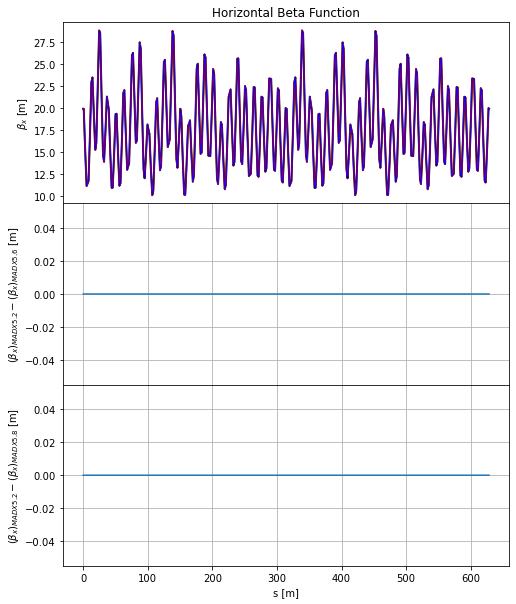

In [51]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[8, 10])
gs = fig1.add_gridspec(ncols=1,nrows=3, height_ratios=[1,1,1])
gs.update(wspace=0.025, hspace=0.)

ax1 = fig1.add_subplot(gs[0,0])
ax2 = fig1.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig1.add_subplot(gs[2,0], sharex=ax1)

ax1.plot(df_52_ptc_flat.s, df_52_ptc_flat.betx, lw=2.0, color='k')
ax1.plot(df_56_ptc_flat.s, df_56_ptc_flat.betx, lw=1.5, color='r')
ax1.plot(df_58_ptc_flat.s, df_58_ptc_flat.betx, lw=1.0, color='b')


ax2.plot(df_52_ptc_flat.s, df_52_ptc_flat.betx-df_56_ptc_flat.betx)
ax3.plot(df_52_ptc_flat.s, df_52_ptc_flat.betx-df_58_ptc_flat.betx)

ax2.grid()
ax3.grid()

#ax1_1 = ax1.twinx()
ax1.set_title('PTC: Flat File: Horizontal Beta Function');
ax1.set_ylabel(r'$\beta_x$ [m]');
ax2.set_ylabel(r'$\left(\beta_x\right)_{MADX 5.2} - \left(\beta_x\right)_{MADX 5.6}$ [m]');
ax3.set_ylabel(r'$\left(\beta_x\right)_{MADX 5.2} - \left(\beta_x\right)_{MADX 5.8}$ [m]');
ax3.set_xlabel('s [m]');

#save_file = save_folder + 'Kick_Comparison_2022_V_FMon.png'
#plt.savefig(save_file, bbox_inches='tight')

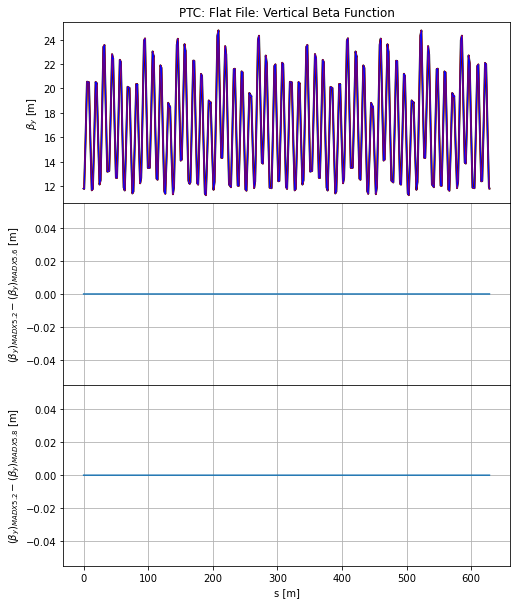

In [52]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[8, 10])
gs = fig1.add_gridspec(ncols=1,nrows=3, height_ratios=[1,1,1])
gs.update(wspace=0.025, hspace=0.)

ax1 = fig1.add_subplot(gs[0,0])
ax2 = fig1.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig1.add_subplot(gs[2,0], sharex=ax1)

ax1.plot(df_52_ptc_flat.s, df_52_ptc_flat.bety, lw=2.0, color='k')
ax1.plot(df_56_ptc_flat.s, df_56_ptc_flat.bety, lw=1.5, color='r')
ax1.plot(df_58_ptc_flat.s, df_58_ptc_flat.bety, lw=1.0, color='b')


ax2.plot(df_52_ptc_flat.s, df_52_ptc_flat.bety-df_56_ptc_flat.bety)
ax3.plot(df_52_ptc_flat.s, df_52_ptc_flat.bety-df_58_ptc_flat.bety)

ax2.grid()
ax3.grid()

#ax1_1 = ax1.twinx()
ax1.set_title('PTC: Flat File: Vertical Beta Function');
ax1.set_ylabel(r'$\beta_y$ [m]');
ax2.set_ylabel(r'$\left(\beta_y\right)_{MADX 5.2} - \left(\beta_y\right)_{MADX 5.6}$ [m]');
ax3.set_ylabel(r'$\left(\beta_y\right)_{MADX 5.2} - \left(\beta_y\right)_{MADX 5.8}$ [m]');
ax3.set_xlabel('s [m]');

#save_file = save_folder + 'Kick_Comparison_2022_V_FMon.png'
#plt.savefig(save_file, bbox_inches='tight')